In [1]:
!pip install pythtb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://www.physics.rutgers.edu/~dhv/pythtb-book-examples/samples/



In [2]:
from pythtb import *
import numpy as np
import matplotlib.pyplot as plt

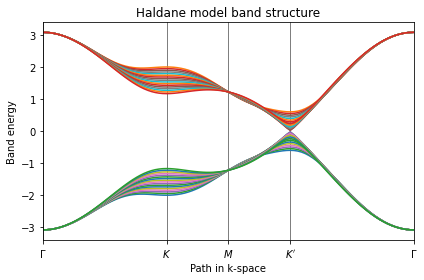

In [56]:
#!/usr/bin/env python

# Haldane model from Phys. Rev. Lett. 61, 2015 (1988)

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

def Haldane2D(Δ, t1, t2, path=None):
    """
    implement Haldane's 1988 model, with pythtb 
    """

    # define lattice vectors
    lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]] ## a1 & a2
    # define coordinates of orbitals
    orb=[[1./3.,1./3.],[2./3.,2./3.]]

    my_model = tb_model(2,2,lat,orb)

    t2 *= np.exp((1.j)*np.pi/2.)
    # set on-site energies
    my_model.set_onsite([-Δ,Δ])
    # set hoppings (one for each connected pair of orbitals)
    # (amplitude, i, j, [lattice vector to cell containing j])
    my_model.set_hop(t1, 0, 1, [ 0, 0])
    my_model.set_hop(t1, 1, 0, [ 1, 0])
    my_model.set_hop(t1, 1, 0, [ 0, 1])
    # add second neighbour complex hoppings
    my_model.set_hop(t2 , 0, 0, [ 1, 0])
    my_model.set_hop(t2 , 1, 1, [ 1,-1])
    my_model.set_hop(t2 , 1, 1, [ 0, 1])
    my_model.set_hop(t2.conjugate(), 1, 1, [ 1, 0])
    my_model.set_hop(t2.conjugate(), 0, 0, [ 1,-1])
    my_model.set_hop(t2.conjugate(), 0, 0, [ 0, 1])

    return my_model

"""if path is None:
        path=[[0.,0.],[2./3.,1./3.],[.5,.5],[1./3.,2./3.], [0.,0.]]
        (k_vec,k_dist,k_node) = my_model.k_path(path, 101)
        evals = my_model.solve_all(k_vec)

        return evals, k_dist, k_node 
    else:
"""

# set model parameters
Δ   =  0.7
t1  = -1.0
t2  = -0.1347*np.exp((1.j)*np.pi/2.)
#t2  = -0.24*np.exp((1.j)*np.pi/2.)
t2c = t2.conjugate()

### our model
my_model = Haldane2D(Δ, t1, t2)

#my_model1 = Haldane2D(Δ, t1, -0.24)

# print tight-binding model
#### my_model.display()

# generate list of k-points following a segmented path in the BZ
# list of nodes (high-symmetry points) that will be connected
path=[[0.,0.],[2./3.,1./3.],[.5,.5],[1./3.,2./3.], [0.,0.]]
# labels of the nodes
label=(r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $')

# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path, 101, report=False)

# inputs:
#   path: see above
#   101: number of interpolated k-points to be plotted
# outputs:
#   k_vec: list of interpolated k-points
#   k_dist: horizontal axis position of each k-point in the list
#   k_node: horizontal axis position of each original node

# obtain eigenvalues to be plotted
evals = my_model.solve_all(k_vec)
#evals = my_model1.solve_all(k_vec)

Δ_  =  0.7
t1_ = -1.0

t2    = np.arange(-0.25, -0.08, 0.01) #, [-0.1347])) ## experiment on t2 np.concatenate( (
Evals = np.empty( (len(t2), k_vec.shape[1], k_vec.shape[0]) )
for i in range(len(t2)):
    my_model = Haldane2D(Δ_, t1_, t2[i])
    Evals[i] = my_model.solve_all(k_vec)





# figure for bandstructure

fig, ax = plt.subplots()
# specify horizontal axis details
# set range of horizontal axis
ax.set_xlim(k_node[0],k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')
# put title
ax.set_title("Haldane model band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")

#ax.plot(k_dist,evals[0]) #evals[0])
#ax.plot(k_dist,evals[1])

# plot first band
for j in range(len(Evals)):
  ax.plot(k_dist,Evals[j,0,:]) #evals[0])
  ax.plot(k_dist,Evals[j,1,:])
# plot second band
#ax.plot(k_dist,evals[1])

# make an PDF figure of a plot
fig.tight_layout()
fig.savefig("haldane_band.pdf")



```
# now plot density of states
fig, ax = plt.subplots()
ax.hist(evals,50,range=(-4.,4.))
ax.set_ylim(0.0,80.0)
# put title
ax.set_title("Haldane model density of states")
ax.set_xlabel("Band energy")
ax.set_ylabel("Number of states")
# make an PDF figure of a plot
fig.tight_layout()
fig.savefig("haldane_dos.pdf")
```



# \begin{align*}
t^\text{critical}_2 &= -\frac{\Delta}{3\sqrt{3}}
\end{align*}

Chern number = -0.00000
Chern number =  0.00000
Chern number =  1.00000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: No contour levels were found within the data range.


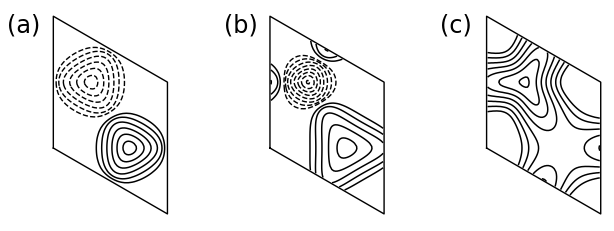

In [57]:
#!/usr/bin/env python
from __future__ import print_function # python3 style print

# Berry curvature of Haldane model

from pythtb import * # import TB model class
import matplotlib.pyplot as plt

# define setup of Haldane model
def set_model(delta,t,t2):
  lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
  orb=[[1./3.,1./3.],[2./3.,2./3.]]
  model=tb_model(2,2,lat,orb)
  model.set_onsite([-delta,delta])
  for lvec in ([ 0, 0], [-1, 0], [ 0,-1]):
    model.set_hop(t, 0, 1, lvec)
  for lvec in ([ 1, 0], [-1, 1], [ 0,-1]):
    model.set_hop(t2*1.j, 0, 0, lvec)
  for lvec in ([-1, 0], [ 1,-1], [ 0, 1]):
    model.set_hop(t2*1.j, 1, 1, lvec)
  return model

# miscellaneous setup
delta=0.7   # site energy shift
t=-1.0      # real first-neighbor hopping

nk=61
dk=2.*np.pi/(nk-1)
k0=(np.arange(nk-1)+0.5)/(nk-1)
kx=np.zeros((nk-1,nk-1),dtype=float)
ky=np.zeros((nk-1,nk-1),dtype=float)
sq3o2=np.sqrt(3.)/2.
for i in range(nk-1):
  for j in range(nk-1):
    kx[i,j]=sq3o2*k0[i]
    ky[i,j]= -0.5*k0[i]+k0[j]

fig,ax=plt.subplots(1,3,figsize=(11,4))
labs=['(a)','(b)','(c)']

# compute Berry curvature and Chern number for three values of t2
for j,t2 in enumerate([0.,-0.06,-0.24]):
  my_model=set_model(delta,t,t2)
  my_array=wf_array(my_model,[nk,nk])
  my_array.solve_on_grid([0.,0.])
  bcurv=my_array.berry_flux([0],individual_phases=True)/(dk*dk)
  chern=my_array.berry_flux([0])/(2.*np.pi)
  print('Chern number =',"%8.5f"%chern)
  
  # make contour plot of Berry curvature
  pos_lvls= 0.02*np.power(2.,np.linspace(0,8,9))
  neg_lvls=-0.02*np.power(2.,np.linspace(8,0,9))
  ax[j].contour(kx,ky,bcurv,levels=pos_lvls,colors='k')
  ax[j].contour(kx,ky,bcurv,levels=neg_lvls,colors='k',linewidths=1.4)

  # remove rectangular box and draw parallelogram, etc.
  ax[j].xaxis.set_visible(False)
  ax[j].yaxis.set_visible(False)
  for loc in ["top","bottom","left","right"]:
    ax[j].spines[loc].set_visible(False)
  ax[j].set(aspect=1.)
  ax[j].plot([0,sq3o2,sq3o2,0,0],[0,-0.5,0.5,1,0],color='k',linewidth=1.4)
  ax[j].set_xlim(-0.05,sq3o2+0.05)
  ax[j].text(-.35,0.88,labs[j],size=24.)

fig.savefig("haldane_bcurv.pdf")
